# Programming Project - Unit 3
*by Débora Azevedo, Eliseu Jayro, Francisco de Paiva and Igor Brandão*

**Goals**
The purpose of this project is explore the following:

- Access Health Graph API - Runkeeper content;
- Geolocation analysis and hypotheses should be explained in detail;

<h1>Requisições de Auxílios Financeiros aos Estudantes - UFRN</h1>

### Compreender os dados financeiros das requisições de auxílios dos estudantes da UFRN 
Esta é uma base de dados realizada para descrever as solicitações de auxílio financeiro para participações de eventos de caráter acadêmico que sejam de interesse institucional, realizadas pelos discentes, aos estudantes da universidade.

- O conteúdo da Tabela está descrita no site:
http://dados.ufrn.br/dataset/2ddc6269-83bb-47d4-8c5e-b633b8682e75/resource/e63245da-b9cc-4e23-aabe-a8d361b96431/download/dicionario-de-dados---requisicoes-de-auxilios-financeiros-aos-estudantes.pdf 
Contém a relação de requisições de auxílio financeiro à estudantes da instituição.

- As instruções de como realizar o procedimento de solicitação de requizição pode ser vista aqui:
https://docs.info.ufrn.br/lib/exe/fetch.php?media=suporte:treinamento:guiapratico08_-_auxilio_financeiro_ao_estudante.pdf

*"[...] A resolução de número 27/2010 do Conselho de Administração da UFRN estabelece que o auxílio financeiro a estudantes poderá ser concedido em caráter excepcional e se destina a alunos devidamente matriculados na UFRN em cursos de graduação, pós-graduação em sentido estrito, cursos de nível médio e técnico profissionalizante, que necessitarem de apoio para <b>participar de atividades/eventos de caráter técnico-científico, didático-pedagógico, esportivo, cultural</b> oficialmente reconhecidas que sejam de interesse institucional."*
https://www.ufrn.br/imprensa/noticias/18898/requisicao-de-auxilio-financeiro-podera-ser-feito-de-forma-eletronico

A estrutura principal da tabela de Requisições de Auxílios Financeiros pelos Estudantes:


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1d1wY0cKBEA59iSO1Q2W-zmQQu5V0f_9t">

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path
dataset_names = ['requisicaoauxiliofinanceiroaoestudante.csv']
dataset_path = 'datasets'

data = {}

for name in dataset_names:
    data[name[:-4]] = pd.read_csv(path.join(dataset_path, name), sep=';', low_memory=False)

In [5]:
#Identificando os anos que constam na tabela de requisições
data['requisicaoauxiliofinanceiroaoestudante'].ano.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006], dtype=int64)

In [6]:
#visualizando a estrutura da tabela
data['requisicaoauxiliofinanceiroaoestudante'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15724 entries, 0 to 15723
Data columns (total 13 columns):
numero                        15724 non-null int64
ano                           15724 non-null int64
proponente                    4047 non-null object
id_unidade_requisitante       15724 non-null int64
nome_unidade_requisitante     15724 non-null object
id_unidade_custo              15724 non-null int64
nome_unidade_custo            15724 non-null object
data_cadastro                 15724 non-null object
inicio_atividade              14183 non-null object
fim_atividade                 14183 non-null object
valor                         15724 non-null float64
numero_alunos_beneficiados    15724 non-null int64
status                        15724 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 1.6+ MB


In [7]:
data['requisicaoauxiliofinanceiroaoestudante'].head()

,numero,ano,proponente,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_cadastro,inicio_atividade,fim_atividade,valor,numero_alunos_beneficiados,status
0,1161,2018,MARIA HELENA BRAGA E VAZ DA COSTA,315,PROGRAMA DE PÓS-GRADUAÇÃO EM GEOGRAFIA,315,PROGRAMA DE PÓS-GRADUAÇÃO EM GEOGRAFIA,19/09/2018,09/10/2018,11/10/2018,600.0,2,ENVIADA
1,1160,2018,TEREZINHA PETRUCIA DA NOBREGA,9226,PROGRAMA DE PÓS-GRADUAÇÃO EM EDUCAÇÃO FÍSICA -...,9226,PROGRAMA DE PÓS-GRADUAÇÃO EM EDUCAÇÃO FÍSICA -...,19/09/2018,25/09/2018,28/09/2018,930.0,4,ENVIADA
2,1159,2018,MARIA HELENA BRAGA E VAZ DA COSTA,315,PROGRAMA DE PÓS-GRADUAÇÃO EM GEOGRAFIA,315,PROGRAMA DE PÓS-GRADUAÇÃO EM GEOGRAFIA,19/09/2018,08/10/2018,11/10/2018,600.0,2,CADASTRADA
3,1158,2018,MARCILIO DE SOUZA VIEIRA,9207,PROGRAMA DE PÓS-GRADUAÇÃO EM ARTES CÊNICAS - FPG,9207,PROGRAMA DE PÓS-GRADUAÇÃO EM ARTES CÊNICAS - FPG,19/09/2018,25/09/2018,28/09/2018,800.0,1,ENVIADA
4,1157,2018,EBERTON JOSE DA SILVA FERREIRA,8067,SECRETARIA ADMINISTRATIVA DA DIRETORIA ADMINIS...,8067,SECRETARIA ADMINISTRATIVA DA DIRETORIA ADMINIS...,19/09/2018,20/09/2018,22/09/2018,80.0,1,AGUARDANDO_AUTORIZACAO_SAE


In [141]:
print("Total de Auxílios presentes na tabela original: " + str(auxilios.size))

Total de Auxílios presentes na tabela original: 204412


### Realizar a limpeza dos dados para análise orçamentária durante os anos
Remoção de colunas que não farão parte da análise ("numero" e "proponente") e remoção de valores nulos das colunas a serem analizadas.

In [13]:
#remover colunas desnecessárias
auxilios = data['requisicaoauxiliofinanceiroaoestudante'].copy()
auxilios = auxilios.drop(columns=['numero','proponente'], axis=1)
auxilios.head()

,ano,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_cadastro,inicio_atividade,fim_atividade,valor,numero_alunos_beneficiados,status
0,2018,315,PROGRAMA DE PÓS-GRADUAÇÃO EM GEOGRAFIA,315,PROGRAMA DE PÓS-GRADUAÇÃO EM GEOGRAFIA,19/09/2018,09/10/2018,11/10/2018,600.0,2,ENVIADA
1,2018,9226,PROGRAMA DE PÓS-GRADUAÇÃO EM EDUCAÇÃO FÍSICA -...,9226,PROGRAMA DE PÓS-GRADUAÇÃO EM EDUCAÇÃO FÍSICA -...,19/09/2018,25/09/2018,28/09/2018,930.0,4,ENVIADA
2,2018,315,PROGRAMA DE PÓS-GRADUAÇÃO EM GEOGRAFIA,315,PROGRAMA DE PÓS-GRADUAÇÃO EM GEOGRAFIA,19/09/2018,08/10/2018,11/10/2018,600.0,2,CADASTRADA
3,2018,9207,PROGRAMA DE PÓS-GRADUAÇÃO EM ARTES CÊNICAS - FPG,9207,PROGRAMA DE PÓS-GRADUAÇÃO EM ARTES CÊNICAS - FPG,19/09/2018,25/09/2018,28/09/2018,800.0,1,ENVIADA
4,2018,8067,SECRETARIA ADMINISTRATIVA DA DIRETORIA ADMINIS...,8067,SECRETARIA ADMINISTRATIVA DA DIRETORIA ADMINIS...,19/09/2018,20/09/2018,22/09/2018,80.0,1,AGUARDANDO_AUTORIZACAO_SAE


In [14]:
auxilios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15724 entries, 0 to 15723
Data columns (total 11 columns):
ano                           15724 non-null int64
id_unidade_requisitante       15724 non-null int64
nome_unidade_requisitante     15724 non-null object
id_unidade_custo              15724 non-null int64
nome_unidade_custo            15724 non-null object
data_cadastro                 15724 non-null object
inicio_atividade              14183 non-null object
fim_atividade                 14183 non-null object
valor                         15724 non-null float64
numero_alunos_beneficiados    15724 non-null int64
status                        15724 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 1.3+ MB


In [17]:
auxilios = auxilios.dropna()

In [18]:
auxilios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14183 entries, 0 to 14182
Data columns (total 11 columns):
ano                           14183 non-null int64
id_unidade_requisitante       14183 non-null int64
nome_unidade_requisitante     14183 non-null object
id_unidade_custo              14183 non-null int64
nome_unidade_custo            14183 non-null object
data_cadastro                 14183 non-null object
inicio_atividade              14183 non-null object
fim_atividade                 14183 non-null object
valor                         14183 non-null float64
numero_alunos_beneficiados    14183 non-null int64
status                        14183 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 1.3+ MB


## Análises na tabela Auxílios

In [19]:
#únicos anos que correspondiam aos valores solicitados
auxilios.ano.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009],
      dtype=int64)

In [20]:
#realizar a remoção das requizições com status 
auxilios[auxilios.status=='FINALIZADA']

,ano,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_cadastro,inicio_atividade,fim_atividade,valor,numero_alunos_beneficiados,status
66,2018,9201,PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS FLORESTA...,9201,PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS FLORESTA...,11/09/2018,19/09/2018,19/09/2018,50.0,1,FINALIZADA
90,2018,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,30013,AUXÍLIO FINANCEIRO AO ESTUDANTE,05/09/2018,17/09/2018,21/09/2018,800.0,1,FINALIZADA
103,2018,4850,AUXÍLIO FINANCEIRO AO ESTUDANTE / CCHLA,4850,AUXÍLIO FINANCEIRO AO ESTUDANTE / CCHLA,04/09/2018,09/10/2018,11/10/2018,360.0,1,FINALIZADA
106,2018,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,04/09/2018,27/09/2018,28/09/2018,240.0,1,FINALIZADA
137,2018,4850,AUXÍLIO FINANCEIRO AO ESTUDANTE / CCHLA,4850,AUXÍLIO FINANCEIRO AO ESTUDANTE / CCHLA,30/08/2018,09/09/2018,16/09/2018,800.0,1,FINALIZADA
141,2018,30021,AUXÍLIO PARA POLÍTICA DE ESPORTE,30021,AUXÍLIO PARA POLÍTICA DE ESPORTE,30/08/2018,05/09/2018,09/09/2018,1750.0,7,FINALIZADA
144,2018,4850,AUXÍLIO FINANCEIRO AO ESTUDANTE / CCHLA,4850,AUXÍLIO FINANCEIRO AO ESTUDANTE / CCHLA,29/08/2018,22/10/2018,26/10/2018,800.0,1,FINALIZADA
145,2018,4850,AUXÍLIO FINANCEIRO AO ESTUDANTE / CCHLA,30013,AUXÍLIO FINANCEIRO AO ESTUDANTE,29/08/2018,09/10/2018,11/10/2018,360.0,1,FINALIZADA
147,2018,4894,DEPARTAMENTO DE GEOFÍSICA,4894,DEPARTAMENTO DE GEOFÍSICA,29/08/2018,10/09/2018,14/09/2018,5000.0,25,FINALIZADA
148,2018,123,DEPARTAMENTO DE GEOLOGIA,123,DEPARTAMENTO DE GEOLOGIA,29/08/2018,06/09/2018,13/09/2018,480.0,1,FINALIZADA


#### Quais unidades de custo possuem mais requisições de Auxílio Financeiro?


In [54]:
#top 10 de unidades que mais solicitam requisições de auxílio financeiro
top10_uni_custo = auxilios.nome_unidade_custo.value_counts()[:10]    
top10_uni_custo

AJUDA FINANCEIRA AO ESTUDANTE                        1286
CCHLA - SECRETARIA ADMINISTRAÇÃO DO CCHLA             524
PROGRAMA DE PÓS-GRADUAÇÃO EM EDUCAÇÃO                 287
ESCOLA DE MÚSICA                                      266
PROGRAMA DE PÓS-GRADUAÇÃO EM ESTUDOS DA LINGUAGEM     250
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA     226
PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS SOCIAIS         222
PROGRAMA DE PÓS-GRADUAÇÃO EM ECOLOGIA                 207
COORDENAÇÃO DO CURSO DE ENFERMAGEM                    196
PROGRAMA DE PÓS-GRADUAÇÃO EM QUÍMICA                  178
Name: nome_unidade_custo, dtype: int64

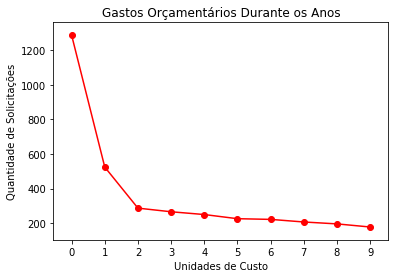

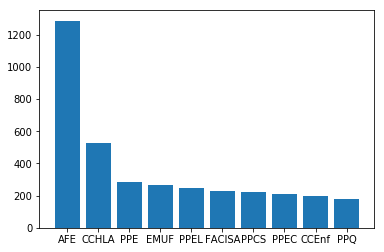

In [56]:
plt.bar(range(10), top10_uni_custo.values)
plt.xticks(range(10), ['AFE', 'CCHLA', 'PPE', 'EMUF', 'PPEL', 'FACISA', 'PPCS', 'PPEC', 'CCEnf', 'PPQ'] )
plt.show()

#### Quais Unidades Requisitantes possuem mais solicitações de Auxílio Financeiro?

In [57]:
#top 10 de unidades que mais solicitam requisições de auxílio financeiro
top10_uni_req = auxilios.nome_unidade_requisitante.value_counts()[:10]   
top10_uni_req

CCHLA - SECRETARIA ADMINISTRAÇÃO DO CCHLA            900
ESCOLA DE MÚSICA                                     347
PROGRAMA DE PÓS-GRADUAÇÃO EM EDUCAÇÃO                267
PROGRAMA DE PÓS-GRADUAÇÃO EM ESTUDOS DA LINGUAGEM    249
COORDENAÇÃO DO CURSO DE ENFERMAGEM                   240
ADMINISTRAÇÃO DO CERES - CAICÓ                       221
COORDENAÇÃO DO CURSO DE MEDICINA                     220
PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS SOCIAIS        219
PROGRAMA DE PÓS-GRADUAÇÃO EM ECOLOGIA                201
ESCOLA DE CIÊNCIAS E TECNOLOGIA                      201
Name: nome_unidade_requisitante, dtype: int64

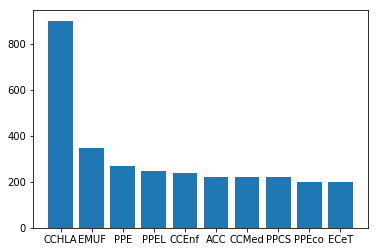

In [58]:
plt.bar(range(10), top10_uni_req.values)
plt.xticks(range(10), ['CCHLA', 'EMUF', 'PPE', 'PPEL', 'CCEnf', 'ACC', 'CCMed', 'PPCS', 'PPEco', 'ECeT'] )
plt.show()

In [27]:
auxilios.status.unique()

array(['ENVIADA', 'CADASTRADA', 'AGUARDANDO_AUTORIZACAO_SAE', 'LIQUIDADA',
       'ATENDIDA', 'ESTORNADA', 'FINALIZADA', 'EM_LIQUIDACAO',
       'A_EMPENHAR', 'EMPENHO_ANULADO', 'NEGADA', 'CANCELADA\n'],
      dtype=object)

In [62]:
auxilios.status.value_counts()

EM_LIQUIDACAO                 7432
LIQUIDADA                     2476
FINALIZADA                    2033
ESTORNADA                     1509
ENVIADA                        314
CADASTRADA                     204
A_EMPENHAR                     147
EMPENHO_ANULADO                 40
ATENDIDA                        16
AGUARDANDO_AUTORIZACAO_SAE       8
NEGADA                           3
CANCELADA\n                      1
Name: status, dtype: int64

In [65]:
valores_ano = [auxilios[auxilios['ano']==value].valor.sum()/1000000 for value in auxilios.ano.unique() ]
anos = auxilios.ano.unique()

In [69]:
auxilios.ano.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009],
      dtype=int64)

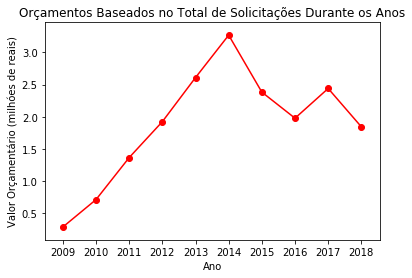

In [72]:
plt.plot(anos, valores_ano, 'r')
plt.scatter(anos, valores_ano, color='red')
plt.xlabel("Ano")
plt.ylabel("Valor Orçamentário (milhóes de reais)")
plt.xticks(anos)
plt.title("Orçamentos Baseados no Total de Solicitações Durante os Anos")
plt.show()

Em 2014 ocorreu o pico das solicitações de assistência, com descida nos dois anos seguintes, e novamente almentado três anos depois

In [71]:
from bokeh.plotting import figure, show
vbar = figure(plot_width=500, plot_height=400)
vbar.vbar(x=anos, width=0.8, top=valores_ano, color="firebrick")
show(vbar)

In [76]:
valores_num_benef = [auxilios[auxilios['ano']==value].numero_alunos_beneficiados.sum() for value in auxilios.ano.unique() ]

In [77]:
valores_num_benef

[2260, 3579, 3559, 3792, 5381, 4309, 3604, 3097, 2056, 771]

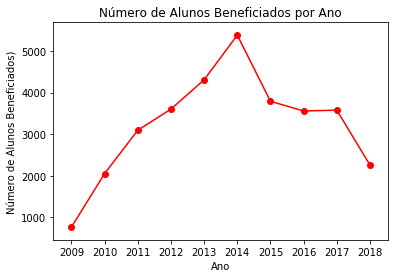

In [79]:
plt.plot(anos, valores_num_benef, 'r')
plt.scatter(anos, valores_num_benef, color='red')
plt.xlabel("Ano")
plt.ylabel("Número de Alunos Beneficiados)")
plt.xticks(anos)
plt.title("Número de Alunos Beneficiados por Ano")
plt.show()